# Imports

In [407]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import pygame
from math import *

In [2]:
n = 2                                            # Number of player(alive)
m = 1                                  # Total number of sources that can deal damage    
l = 0
Dam = [1]  
k=2*n+m+l
const_1= 0.668
A = [1,1,const_1,1,1]

def Event(A):
    Damage = [0]*n
    counts = 10000
    qc = QuantumCircuit()
    q = QuantumRegister(2*(n+l+m)+1+n, 'q')
    c = ClassicalRegister(n, 'c')    
    qc.add_register(q)
    qc.add_register(c)
    for i in range (2*n+m+l+1):
        if i <n:                                                               
            qc.u3(A[i]*np.pi, 0, 0, q[i])
            qc.x(q[i+n])
            qc.u3(A[i+n]*np.pi, 0, 0, q[i+n])
        if n<=i<n+m:                                                            
            qc.x(q[i+n])
            qc.u3(A[i+n]*(1-Dam[i-n])*np.pi, 0, 0, q[i+n])
        if n+m<=i<n+m+l:
            qc.x(q[i+n])
            qc.u3(A[i+n]*np.pi, 0, 0, q[i+n])
        if i == n+m+l:
            qc.mct(q[2*n:2*n+l+m], q[2*n+m+l+1], q[3*n+m+l+2:3*n+2*l+2*m+1])
        if n+m+l<i<2*n+m+l+1:        
            qc.ccx(q[i-(n+m+l+1)], q[i-(m+l+1)], q[2*n+m+l])           
            qc.ccx(q[2*n+m+l], q[2*n+m+l+1], q[i+n+1])
            qc.ccx(q[i-(n+m+l+1)], q[i-(m+l+1)], q[2*n+m+l])
            qc.measure(q[i+1+n], c[2*n+m+l-i])
    qc.draw()
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend=backend,shots = counts)
    job_result = job.result()
    A = list(job_result.get_counts(qc).keys())
    for i in A:
        B = list(i)
        for j in range (n):
            if B[j] == '1':
                Damage[j]+= int(job_result.get_counts(qc).get(i)) /counts
    return Damage

print(Event(A))

[0.2496, 0]


In [277]:
def circuit(mat):
    qc = QuantumCircuit(4,4)
    for i in range(4):
        temp_const_1 = list(np.where(np.array(mat[:,i]).flatten()==1)[0])
        temp_const_2 = list(np.where(np.array(mat[:,i]).flatten()==2)[0])
        temp_const_3 = list(np.where(np.array(mat[:,i]).flatten()==3)[0])
        
        
        if len(temp_const_1) != 0:
            if len(temp_const_3) ==0:
                qc.h(temp_const_1)
            else:
                qc.ch(temp_const_3,temp_const_1)
        if len(temp_const_2) != 0:
            qc.mcx(temp_const_3,temp_const_2)
        
    qc.measure([0,1,2,3],[0,1,2,3])
    return(qc)

In [282]:
def result(circuit,counts):
    qc = circuit
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend=backend,shots = counts)
    job_result = job.result()
    result = job_result.get_counts(qc)
    return(result)

In [334]:
def val(result):
    p = np.array([0]*16)
    for i in range(16):
        x = np.binary_repr(i, width=4)
        if x in result:
            p[i] = 1
    p = p.reshape(4, 4)
    return(p)

In [478]:
temp_const_3 = int(list(result(circuit(player_mat[0]),1).keys())[0],2)


1.0

In [483]:
8%4

0

In [353]:
int("110100010",2)

[0, 1]

In [336]:
val(result(circuit(player_mat[0]),100))

array([[0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 0]])

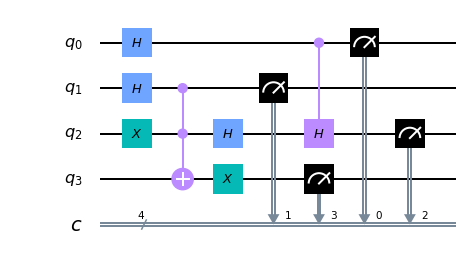

In [302]:
circuit(player_mat[0]).draw('mpl')

In [244]:
player_mat[0]

array([[3., 0., 0., 1.],
       [3., 0., 0., 0.],
       [0., 3., 2., 0.],
       [2., 1., 3., 2.]])

In [183]:
qc1.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c_0: 
     
c_1: 
     
c_2: 
     
c_3:

In [325]:
def grid_pos(x,y):
        temp_x_pos = []
        temp_y_pos = []
        for i in range(0,4):
            temp_x_pos.append(s_d*i+x)
            temp_y_pos.append(s_d*i+y)
        temp_x_pos.sort()
        temp_y_pos.sort()
        return(temp_x_pos,temp_y_pos)

In [497]:
def position_check(bool_grid,player1_pos):
    check_2 = False
    for i in range(-1,2):
        for j in range(-1,2):
            if bool_grid[player1_pos[0]-i,player1_pos[1]-j] == 1 and i+j+i*j!=0:
                check_2 = True
                break
    return((bool_grid[player1_pos[1],player1_pos[0]] ==1 and len(np.where(bool_grid==1)[0])!=1) or check_2 and len(np.where(bool_grid==1)[0])==1)
    
    

# Intializarion of Data and Constant

In [412]:
xmin = ymin = 0

ymax = 700
p_y = 0.05*ymax
d_x = ymax/2-p_y#450
xmax = d_x*3
r_1 = 0.320*ymax                                        # Constant for the division between the circuit and gates
s_d = 0.112*ymax                                           # Constatnt for grids in the first 2 box 

x_temp= y_temp = 0
Gate = 0
x_c = []
y_c1 = []
y_c2 = []
x_gate = []
y_gate_1 = []
y_gate_2 = []
for i in range (4):
    y_c1.append(0.09*ymax+0.08*ymax*i)
    x_c.append((0.965+0.1*i)*ymax)
    y_c2.append(0.59*ymax+0.08*ymax*i)
for i in range(3):
    x_gate.append((0.965+0.1*i)*ymax)
    y_gate_1.append(ymax*0.435)
    y_gate_2.append(ymax*0.935)
y_c = [y_c1,y_c2]
y_gate=[y_gate_1,y_gate_2]
x_cancle = 1.265*ymax
y_cancle = [ymax*0.435,ymax*0.935]
H = pygame.image.load(r'Resource\H.jpg')
X = pygame.image.load(r'Resource\X.jpg')
D = pygame.image.load(r'Resource\D.jpg')
C = pygame.image.load(r'Resource\C.png')
coin = pygame.image.load(r'Resource\coin.jpg')
player1_image = pygame.image.load(r'Resource\player.png')
player2_image = pygame.image.load(r'Resource\player.jpg')

edge = int(0.07*ymax)
H = pygame.transform.scale(H, (edge, edge))
X = pygame.transform.scale(X, (edge, edge))
D = pygame.transform.scale(D, (edge, edge))
C = pygame.transform.scale(C, (edge, edge))
coin = pygame.transform.scale(coin, (floor(edge/2), floor(edge/2)))
player1_image = pygame.transform.scale(player1_image, (edge, edge))
player2_image = pygame.transform.scale(player2_image, (edge, edge))
player_image = [player1_image,player2_image]

coord_grid= [[[],[]],[[],[]]]
for i in range(2):
        for j in range(2):
            coord_grid[i][j] = grid_pos(d_x*i,j*ymax/2+p_y)

In [371]:
temp_mat

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

# Structure of the Board

In [390]:
def Structure():
    pygame.draw.line(win, (0,0,0), (0, ymax/2),(xmax,ymax/2), 2)   
    pygame.draw.line(win, (0,0,0), (d_x,p_y),(d_x,ymax/2), 5)
    pygame.draw.line(win, (0,0,0), (d_x*2,p_y),(d_x*2,ymax/2), 5)  
    pygame.draw.line(win, (0,0,0), (d_x,ymax/2+p_y),(d_x,ymax), 5)  
    pygame.draw.line(win, (0,0,0), (d_x*2,ymax/2+p_y),(d_x*2,ymax), 5)  

    pygame.draw.line(win, (0,0,0), (0,p_y),(xmax,p_y), 2)
    pygame.draw.line(win, (0,0,0), (0,ymax/2+p_y),(xmax,ymax/2+p_y), 2)
    # Division between the last box
    pygame.draw.line(win, (0,0,0), (d_x*2,r_1+p_y),(xmax,r_1+p_y), 2)
    pygame.draw.line(win, (0,0,0), (d_x*2,r_1+p_y+ymax/2),(xmax,r_1+p_y+ymax/2), 2)
    
    
    # Section in First and second Box 
    def grid(x,y):
        for i in range(1,4):
            pygame.draw.line(win, (0,0,0), (x,s_d*i+y),(x+d_x,s_d*i+y), 2)
            pygame.draw.line(win, (0,0,0), (s_d*i+x,y),(s_d*i+x,y+d_x), 2)
        return()
    
    for i in range(2):
        for j in range(2):
            grid(d_x*i,j*ymax/2+p_y)
            
            
    
    #Gates Position
    def gates(x,y):
        win.blit(H, (x+0.03*ymax, y+0.03*ymax)) 
        win.blit(X, (x+0.13*ymax, y+0.03*ymax)) 
        win.blit(D, (x+0.23*ymax, y+0.03*ymax))
        win.blit(C, (x+0.33*ymax, y+0.03*ymax))
                          
        return()
    gates(0.9*ymax,ymax*0.370)
    gates(0.9*ymax,ymax*0.870)
    
    # Qubit Wire
    for i in range (4):
        pygame.draw.line(win, (0,0,0), (d_x*2+0.0148148*xmax,0.09*ymax+0.08*ymax*i),((1-0.0148148)*xmax,0.09*ymax+0.08*ymax*i), 2)
        pygame.draw.line(win, (0,0,0), (d_x*2+0.0148148*xmax,0.59*ymax+0.08*ymax*i),((1-0.0148148)*xmax,0.59*ymax+0.08*ymax*i), 2)
    
    
    return()

# Pygame

In [502]:
player_mat= [np.zeros((4,4)),np.zeros((4,4))]
player = 1
bool_grid = np.array([0]*16)
bool_grid = bool_grid.reshape(4, 4)
temp_mat = 3*np.ones((4,4))
check_1 = True
check_3 = 0
player1_pos = [0,0]
pygame.init()
win = pygame.display.set_mode((int(xmax),int(ymax)))
pygame.display.set_caption("QGame_1")
run = True

while run:
    ###
    pygame.time.delay(10)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
    
    
    win.fill((255,255,255))
    ###
    
    if player ==1:
        player_mat[1] = np.zeros((4,4))
    else:
        player_mat[0] = np.zeros((4,4))
    Structure()
    Gates_image = [H,X,D]
    
    for i in range(len(x_c)):
        for j in range(len(y_c1)):
            pygame.draw.circle(win, (0,0,0), (x_c[i],y_c1[j]), 3)
            pygame.draw.circle(win, (0,0,0), (x_c[i],y_c2[j]), 3)
    
    xm_pos,ym_pos=pygame.mouse.get_pos()
    

    if pygame.mouse.get_pressed()[0]:
        if abs(xm_pos-x_cancle)<=(0.035*ymax) and abs(ym_pos - y_cancle[int(player-1)])<=(0.035*ymax):
            player_mat[player-1] = np.zeros((4,4))
            check_1 = True
        
        if Gate==0:
            for i in range(3):
                if abs(xm_pos-x_gate[i])<=(0.035*ymax) and abs(ym_pos - y_gate[int(player-1)][i])<=(0.035*ymax):
                    Gate = i+1
        elif Gate ==3:
            for i in range(4):
                    for j in range(4):
                        if abs(xm_pos-x_c[i])<=(0.035*ymax) and abs(ym_pos - y_c[player-1][j])<=(0.035*ymax):
                            xm_pos = x_c[i]
                            ym_pos =  y_c[player-1][j]
                            temp_cons1 = j
                            temp_cons2 = i
                            for k in range(4):
                                if player_mat[player-1][k,i] !=0:
                                    #print(k,i)
                                    pygame.draw.line(win, (100,100,100), (x_c[i],y_c[player-1][j]),(x_c[i],y_c[player-1][k]), 3)
            win.blit(Gates_image[Gate-1], (xm_pos-0.035*ymax, ym_pos-0.035*ymax))
        else:
            #if player == 1:
            for i in range(4):
                    for j in range(4):
                        if abs(xm_pos-x_c[i])<=(0.035*ymax) and abs(ym_pos - y_c[player-1][j])<=(0.035*ymax):
                            xm_pos = x_c[i]
                            ym_pos =  y_c[player-1][j]
                            temp_cons1 = j
                            temp_cons2 = i
            win.blit(Gates_image[Gate-1], (xm_pos-0.035*ymax, ym_pos-0.035*ymax))
    else:
        if Gate ==3 and abs(xm_pos-x_c[temp_cons2])<=(0.035*ymax) and abs(ym_pos - y_c[player-1][temp_cons1])<=(0.035*ymax):
            temp_const_0 = len(np.where(np.array(player_mat[player-1][:,temp_cons2]).flatten()!=0)[0])
            temp_const_1 = len(np.where(np.array(player_mat[player-1][:,temp_cons2]).flatten()==1)[0])
            temp_const_2 = len(np.where(np.array(player_mat[player-1][:,temp_cons2]).flatten()==2)[0])
            temp_const_3 = len(np.where(np.array(player_mat[player-1][:,temp_cons2]).flatten()==3)[0])
            if  temp_const_0 != 0 and temp_const_1+temp_const_2 ==1:
                if temp_const_1 ==1 and temp_const_3<1:
                    player_mat[player-1][temp_cons1,temp_cons2] = Gate
                    check_1 = True
                elif temp_const_2 ==1:
                    player_mat[player-1][temp_cons1,temp_cons2] = Gate
                    check_1 = True
            
        elif Gate!= 0 and abs(xm_pos-x_c[temp_cons2])<=(0.035*ymax) and abs(ym_pos - y_c[player-1][temp_cons1])<=(0.035*ymax) :
            if len(np.where(np.array(player_mat[player-1][:,temp_cons2]).flatten()==3)[0]) ==0:
                player_mat[player-1][temp_cons1,temp_cons2] = Gate
                check_1 = True
        Gate = 0


    for i in range (len(x_c)):
        for j in range (len(x_c)):
            if player_mat[player-1][i,j]==3:
                for k in range (4):
                    if player_mat[player-1][k,j]!=0 and player_mat[player-1][k,j]!=3:
                        #print(i,k)
                        pygame.draw.line(win, (100,100,100), (x_c[j],y_c[player-1][i]),(x_c[j],y_c[player-1][k]), 3)
                win.blit(Gates_image[int(player_mat[player-1][i,j])-1], (x_c[j]-0.035*ymax, y_c[player-1][i]-0.035*ymax))
    for i in range (len(x_c)):
        for j in range (len(x_c)):
                  
            if player_mat[player-1][i,j]!=0and player_mat[player-1][i,j]!=3:
                win.blit(Gates_image[int(player_mat[player-1][i,j])-1], (x_c[j]-0.035*ymax, y_c[player-1][i]-0.035*ymax))
    
    if check_1:
        bool_grid = val(result(circuit(player_mat[player-1]),100))
        check_1 = False
        
    win.blit(player_image[player], (coord_use[0][player1_pos[0]]+0.025*ymax, coord_use[1][player1_pos[1]]+0.025*ymax))
    
    coord_use = coord_grid[player-1][player-1]
    for i in range (4):
        for j in range(4):
            if bool_grid[i,j]==1:
                win.blit(coin, (coord_use[0][j]+0.075*ymax, coord_use[1][i]+0.075*ymax)) 
                
    #coin
    
    keys=pygame.key.get_pressed()
    #print(bool_grid[player1_pos[0],player1_pos[1]] ==1)
    #check_3 = True
    if keys[pygame.K_RETURN]!= True and check_3 == 1:
        check_3 = 2

    if keys[pygame.K_RETURN]and check_3==0 and position_check(bool_grid,player1_pos):
        temp_const_3 = int(list(result(circuit(player_mat[0]),1).keys())[0],2)
        player1_pos[1] = temp_const_3//4
        player1_pos[0] = temp_const_3%4
        check_3 = 1
    elif keys[pygame.K_RETURN] and check_3 == 2:
        run = False
        
    pygame.display.update()
pygame.quit()

In [499]:
g = 1
if g ==1:
    g = 2
elif g==2:
    g = 3
g












2

In [454]:
np.where(coord_use==1)[0]

array([], dtype=int64)

In [451]:
(bool_grid[player1_pos[0],player1_pos[1]] ==1 and len(np.where(coord_use==1)[0])!=1)

True

In [450]:
position_check()

False


False

In [438]:
for i in range(-1,2):
    print(i)

-1
0
1


In [424]:
player1_pos[0]

0

In [256]:
print(player_mat[0])

[[3. 0. 3. 0.]
 [3. 3. 0. 0.]
 [3. 1. 1. 0.]
 [2. 0. 0. 0.]]


In [239]:
x_c[1]

745.5

In [437]:
np.where(bool_grid==0)

(array([0, 0, 1, 1, 2, 2, 3, 3], dtype=int64),
 array([2, 3, 2, 3, 0, 1, 0, 1], dtype=int64))

In [435]:
bool_grid

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])